In [399]:
import joblib
import pandas as pd

res_edge_df = pd.DataFrame(joblib.load("res_fakeedge_2022_12_30_03_56_24.joblib"))
res_rwp_df = pd.DataFrame(joblib.load("res_rwp_2022_12_31_04_47_15.joblib"))
res_manh_df = pd.DataFrame(joblib.load("res_manh_2022_12_31_04_51_56.joblib"))

In [400]:
import numpy as np


def zeros_to_nan(arr: np.ndarray):
    arr[np.all(arr == 0, axis=1)] = np.nan
    return arr


res_manh_df["res_list"] = res_manh_df["res_list"].transform(lambda l: [zeros_to_nan(arr) for arr in l])
res_rwp_df["res_list"] = res_rwp_df["res_list"].transform(lambda l: [zeros_to_nan(arr) for arr in l])
res_edge_df["res_list"] = res_edge_df["res_list"].transform(lambda l: [zeros_to_nan(arr) for arr in l])

In [401]:
res_manh_df["res_list"] = res_manh_df["res_list"].transform(np.dstack)
res_rwp_df["res_list"] = res_rwp_df["res_list"].transform(np.dstack)
res_edge_df["res_list"] = res_edge_df["res_list"].transform(np.dstack)

In [402]:
res_manh_df["res_list"] = res_manh_df["res_list"].transform(np.dstack)
res_rwp_df["res_list"] = res_rwp_df["res_list"].transform(np.dstack)
res_edge_df["res_list"] = res_edge_df["res_list"].transform(np.dstack)

In [403]:
res_manh_df["succ_rate"] = res_manh_df["res_list"].transform(
    lambda arr: np.mean(np.all(~np.isnan(arr), axis=0).sum(axis=1) == 1000))
res_rwp_df["succ_rate"] = res_rwp_df["res_list"].transform(
    lambda arr: np.mean(np.all(~np.isnan(arr), axis=0).sum(axis=1) == 1000))
res_edge_df["succ_rate"] = res_edge_df["res_list"].transform(
    lambda arr: np.mean(np.all(~np.isnan(arr), axis=0).sum(axis=1) == 1000))

In [404]:
res_manh_df["exp_mean"] = res_manh_df["res_list"].transform(lambda arr: np.nanmean(arr, axis=1))
res_rwp_df["exp_mean"] = res_rwp_df["res_list"].transform(lambda arr: np.nanmean(arr, axis=1))
res_edge_df["exp_mean"] = res_edge_df["res_list"].transform(lambda arr: np.nanmean(arr, axis=1))

/tmp/ipykernel_1037256/3456749177.py:1: RuntimeWarning: Mean of empty slice
  res_manh_df["exp_mean"] = res_manh_df["res_list"].transform(lambda arr: np.nanmean(arr, axis=1))
/tmp/ipykernel_1037256/3456749177.py:2: RuntimeWarning: Mean of empty slice
  res_rwp_df["exp_mean"] = res_rwp_df["res_list"].transform(lambda arr: np.nanmean(arr, axis=1))
/tmp/ipykernel_1037256/3456749177.py:3: RuntimeWarning: Mean of empty slice
  res_edge_df["exp_mean"] = res_edge_df["res_list"].transform(lambda arr: np.nanmean(arr, axis=1))


In [405]:
res_manh_df["exp_std"] = res_manh_df["res_list"].transform(lambda arr: np.nanstd(arr, axis=1))
res_rwp_df["exp_std"] = res_rwp_df["res_list"].transform(lambda arr: np.nanstd(arr, axis=1))
res_edge_df["exp_std"] = res_edge_df["res_list"].transform(lambda arr: np.nanstd(arr, axis=1))

/home/ania/PycharmProjects/py4j_test/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ania/PycharmProjects/py4j_test/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ania/PycharmProjects/py4j_test/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [406]:
from operator import itemgetter

res_edge_df["p"] = res_edge_df["pq"].transform(itemgetter(0))

In [407]:
nArray = [50, 100, 200, 300]
ttlArray = [1, 2, 3, 4, 5]
dArray = [20, 30, 50, 70, 80, 100, 120]
pArray = [x*x*np.pi/1000/1000 for x in dArray]

In [408]:
res_edge_df["d"] = res_manh_df["d"]

# Success rate

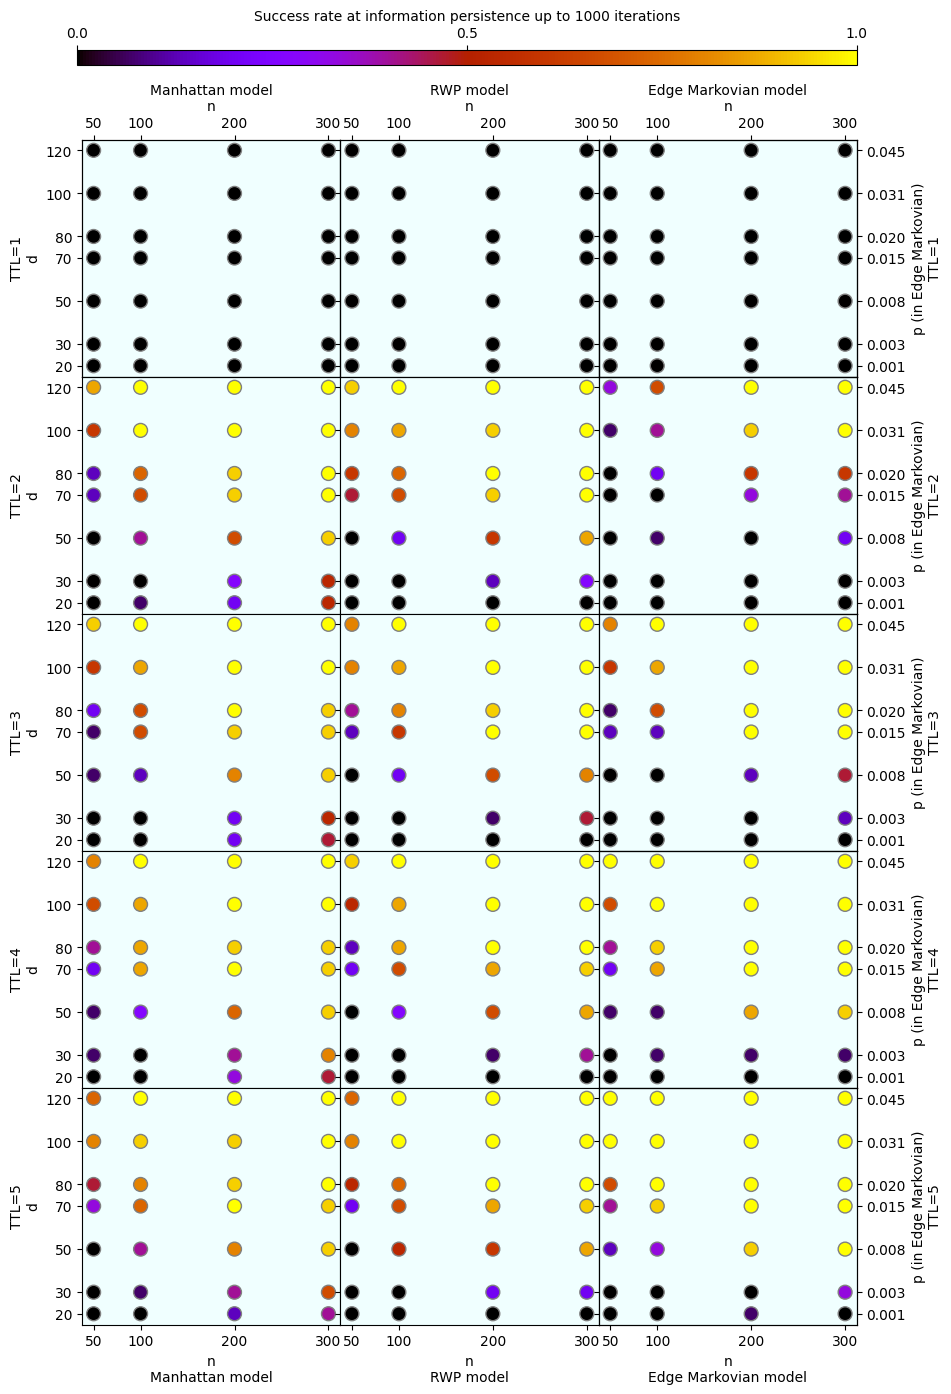

In [409]:
from matplotlib.cm import ScalarMappable
from matplotlib import pyplot as plt

fig: plt.Figure = plt.figure(figsize=(10, 15))
gs = fig.add_gridspec(5, 3, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row')
colormap = 'gnuplot'
for ind, res, name in zip(range(3), [res_manh_df, res_rwp_df, res_edge_df],
                          ["Manhattan model", "RWP model", "Edge Markovian model"]):
    row_ind = 0
    for ttl, df in res.groupby("ttl", sort=True):
        ax: plt.Axes = axes[row_ind, ind]
        ax.scatter(df["n"], df["d"], c=df["succ_rate"], cmap=colormap, s=100, edgecolors="gray")
        ax.set_ylabel(f"TTL={ttl}\nd")
        ax.set_xlabel(f"n\n{name}")
        # pl = df.plot(ax=ax, kind='scatter', x="n", y="d", c="succ_rate", cmap="jet",colorbar=False)
        ax.set_yticks(dArray)
        ax.set_xticks(nArray)
        ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
        ax.label_outer()
        if row_ind == 0:
            ax3: plt.Axes = ax.twiny()
            ax3.set_xlabel(f"{name}\nn")
            ax3.set_xlim(*ax.get_xlim())
            ax3.set_xticks(nArray)
            ax3.label_outer()
            ax3.set_xticklabels(nArray)
        if ind == 2:
            ax2: plt.Axes = ax.twinx()  # instantiate a second axes that shares the same x-axis
            ax2.set_ylabel(f'p (in Edge Markovian)\nTTL={ttl}')
            ax2.set_ylim(*ax.get_ylim())
            ax2.set_yticks(dArray)
            ax2.label_outer()
            ax2.set_yticklabels(["%.3f" % p for p in pArray])  # ax2.tick_params(axis='y', )
        facecol = "powderblue" if ind == 0 else "paleturquoise" if ind == 1 else "lavender"
        ax.set_facecolor("azure")
        row_ind += 1
# for ax in chain.from_iterable(axes):
#     ax.label_outer()
# fig.suptitle("Infomation persistance success rate at 1000 iterations")
fig.subplots_adjust(top=0.9)
cbar_ax: plt.Axes = fig.add_axes([0.12, 0.95, 0.78, 0.01])
plt.colorbar(ScalarMappable(cmap=colormap), cax=cbar_ax,
             label="Success rate at information persistence up to 1000 iterations", orientation='horizontal')
cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_label_position("top")
cbar_ax.xaxis.set_ticks([0.0, 0.5, 1.0])

plt.savefig("success_rate.pdf", bbox_inches='tight', pad_inches=0)
# plt.show()


# Fraction of nodes with information

## Edge Markovian

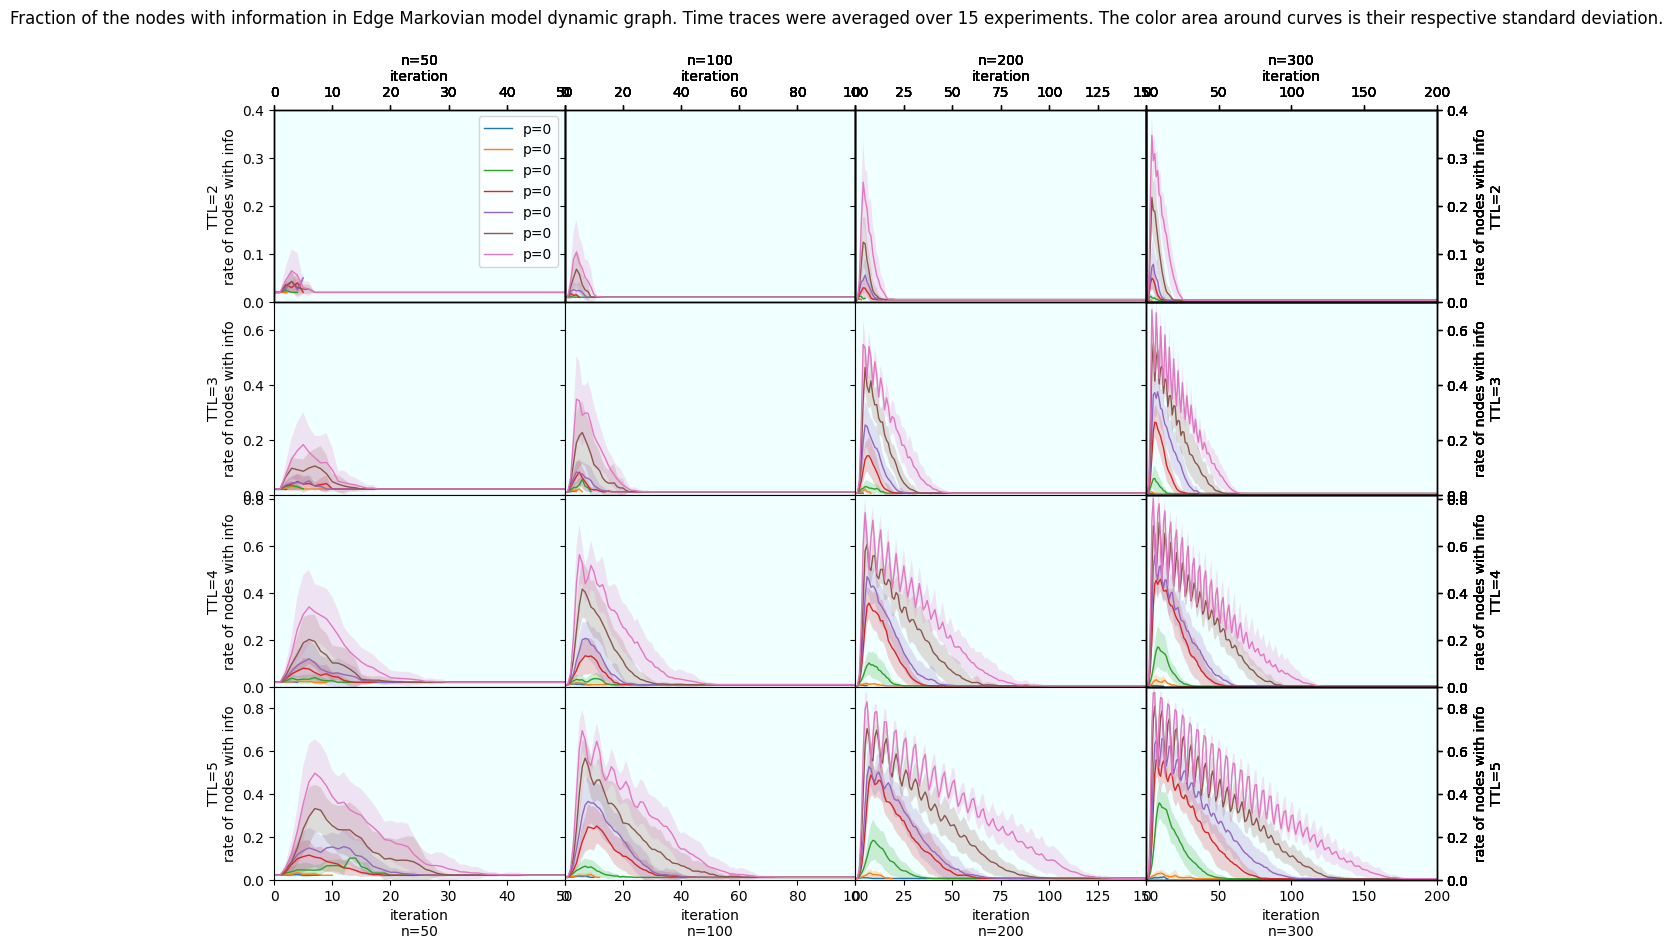

In [410]:
fig: plt.Figure = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(4, 4, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row')
colormap = 'gnuplot'
xlims = [50, 100, 150, 200]
ylims = [0.4, 0.7, 0.82, 0.9]
for ttl, df_ttl in res_edge_df.groupby("ttl", sort=True):
    ttl = int(ttl)
    if ttl == 1: continue
    ind_ttl = ttlArray.index(ttl) - 1
    for n, df_n in df_ttl.groupby("n", sort=True):
        n = int(n)
        ind_n = nArray.index(n)
        ax: plt.Axes = axes[ind_ttl, ind_n]
        for exp_no in range(len(df_n)):
            l = np.sum(~np.isnan(df_n["exp_mean"].iloc[exp_no][0, :]))
            # l=1000
            d = int(df_n["p"].iloc[exp_no])
            val = df_n["exp_mean"].iloc[exp_no][0, :l] / n
            err = df_n["exp_std"].iloc[exp_no][0, :l] / n
            ax.plot(range(l), val, label=f"p={d}", linewidth=1)
            lower = val - err
            upper = val + err
            ax.fill_between(range(l), lower, upper, alpha=0.2)
            # ax.legend()
            ax.set_xlim(0, xlims[ind_n])
            ax.set_ylim(0, ylims[ind_ttl])
            ax.set_xlabel(f"iteration\nn={n}")
            ax.set_ylabel(f"TTL={ttl}\nrate of nodes with info")
            ax.label_outer()
            if ttl == 2:
                ax3: plt.Axes = ax.twiny()
                ax3.set_xlabel(f"n={n}\niteration")
                ax3.set_xlim(*ax.get_xlim())
                # ax3.set_xticks(ax.get_xticks())
                ax3.label_outer()  # ax3.set_xticklabels(ax.get_xticklabels())  # ax3.tick_params(axis="x", bottom=False, top=True, labelbottom=False, labeltop=True)
            if n == 300:
                ax2: plt.Axes = ax.twinx()  # instantiate a second axes that shares the same x-axis
                ax2.set_ylabel(f'rate of nodes with info\nTTL={ttl}')
                ax2.set_ylim(*ax.get_ylim())
                # ax2.set_yticks(ax.get_yticks())
                ax2.label_outer()  # ax2.set_yticklabels(ax.get_yticklabels())  # ax2.tick_params(axis='y', )
        ax.set_facecolor("azure")
axes[0][0].legend()
fig.suptitle(
    "Fraction of the nodes with information in Edge Markovian model dynamic graph. Time traces were averaged over 15 experiments. The color area around curves is their respective standard deviation.")
plt.savefig("frac_info_edge.pdf", bbox_inches='tight', pad_inches=0, dpi=500)


## Manhattan

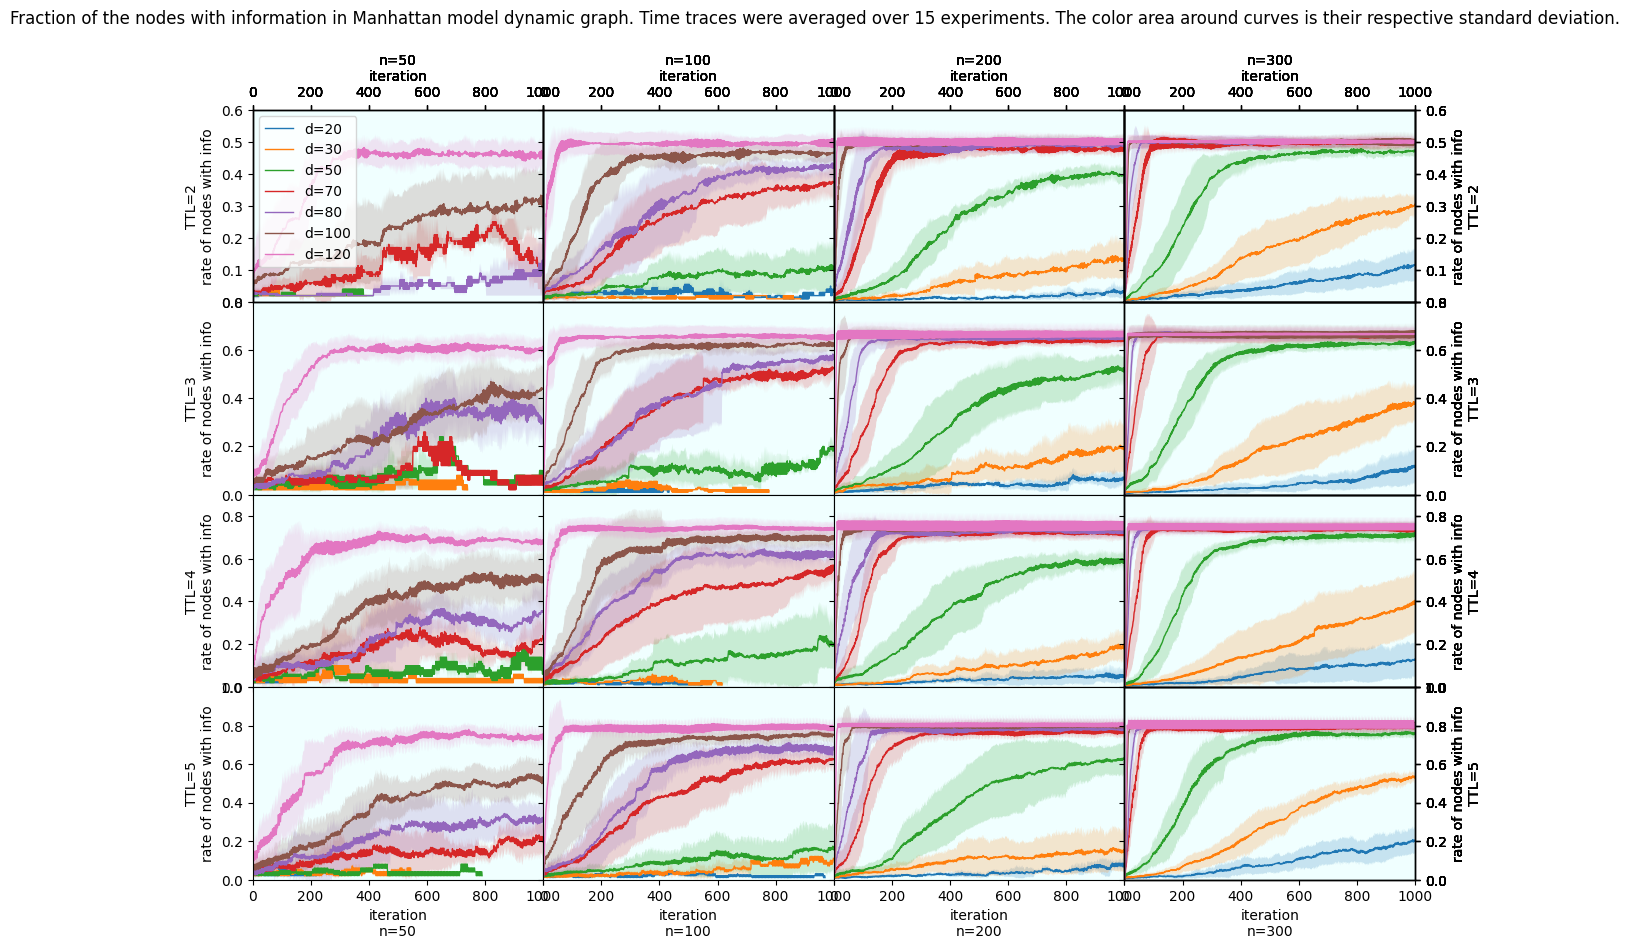

In [411]:
fig: plt.Figure = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(4, 4, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row')
colormap = 'gnuplot'
xlims = [1000] * 5
ylims = [0.6, 0.8, 0.9, 1]
for ttl, df_ttl in res_manh_df.groupby("ttl", sort=True):
    ttl = int(ttl)
    if ttl == 1: continue
    ind_ttl = ttlArray.index(ttl) - 1
    for n, df_n in df_ttl.groupby("n", sort=True):
        n = int(n)
        ind_n = nArray.index(n)
        ax: plt.Axes = axes[ind_ttl, ind_n]
        for exp_no in range(len(df_n)):
            l = np.sum(~np.isnan(df_n["exp_mean"].iloc[exp_no][0, :]))
            # l=1000
            d = int(df_n["d"].iloc[exp_no])
            val = df_n["exp_mean"].iloc[exp_no][0, :l] / n
            err = df_n["exp_std"].iloc[exp_no][0, :l] / n
            ax.plot(range(l), val, label=f"d={d}", linewidth=1)
            lower = val - err
            upper = val + err
            ax.fill_between(range(l), lower, upper, alpha=0.2)
            # ax.legend()
            ax.set_xlim(0, xlims[ind_n])
            ax.set_ylim(0, ylims[ind_ttl])
            ax.set_xlabel(f"iteration\nn={n}")
            ax.set_ylabel(f"TTL={ttl}\nrate of nodes with info")
            ax.label_outer()
            if ttl == 2:
                ax3: plt.Axes = ax.twiny()
                ax3.set_xlabel(f"n={n}\niteration")
                ax3.set_xlim(*ax.get_xlim())
                # ax3.set_xticks(ax.get_xticks())
                ax3.label_outer()  # ax3.set_xticklabels(ax.get_xticklabels())

            if n == 300:
                ax2: plt.Axes = ax.twinx()  # instantiate a second axes that shares the same x-axis
                ax2.set_ylabel(f'rate of nodes with info\nTTL={ttl}')
                ax2.set_ylim(*ax.get_ylim())
                # ax2.set_yticks(ax.get_yticks())
                ax2.label_outer()  # ax2.set_yticklabels(ax.get_yticklabels())  # ax2.tick_params(axis='y', )
        ax.set_facecolor("azure")
axes[0][0].legend()
fig.suptitle(
    "Fraction of the nodes with information in Manhattan model dynamic graph. Time traces were averaged over 15 experiments. The color area around curves is their respective standard deviation.")
plt.savefig("frac_info_manhattan.pdf", bbox_inches='tight', pad_inches=0, dpi=500)

# RWP

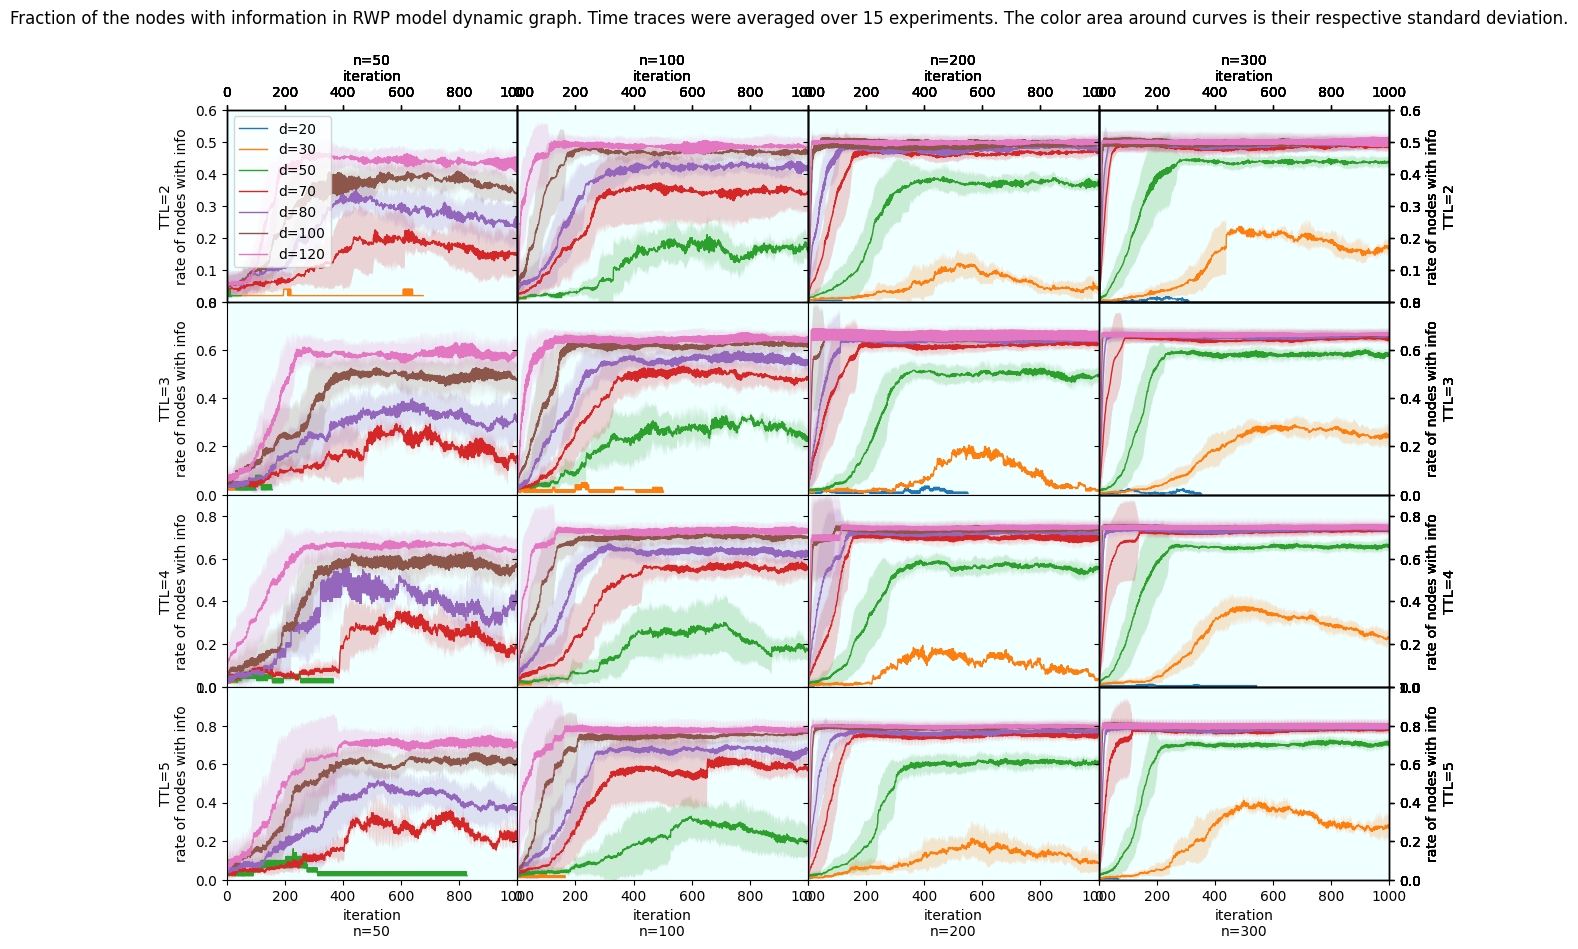

In [412]:
fig: plt.Figure = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(4, 4, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row')
colormap = 'gnuplot'
xlims = [1000] * 5
ylims = [0.6, 0.8, 0.9, 1]
for ttl, df_ttl in res_rwp_df.groupby("ttl", sort=True):
    ttl = int(ttl)
    if ttl == 1: continue
    ind_ttl = ttlArray.index(ttl) - 1
    for n, df_n in df_ttl.groupby("n", sort=True):
        n = int(n)
        ind_n = nArray.index(n)
        ax: plt.Axes = axes[ind_ttl, ind_n]
        for exp_no in range(len(df_n)):
            l = np.sum(~np.isnan(df_n["exp_mean"].iloc[exp_no][0, :]))
            # l=1000
            d = int(df_n["d"].iloc[exp_no])
            val = df_n["exp_mean"].iloc[exp_no][0, :l] / n
            err = df_n["exp_std"].iloc[exp_no][0, :l] / n
            ax.plot(range(l), val, label=f"d={d}", linewidth=1)
            lower = val - err
            upper = val + err
            ax.fill_between(range(l), lower, upper, alpha=0.2)
            # ax.legend()
            ax.set_xlim(0, xlims[ind_n])
            ax.set_ylim(0, ylims[ind_ttl])
            ax.set_xlabel(f"iteration\nn={n}")
            ax.set_ylabel(f"TTL={ttl}\nrate of nodes with info")
            ax.label_outer()
            if ttl == 2:
                ax3: plt.Axes = ax.twiny()
                ax3.set_xlabel(f"n={n}\niteration")
                ax3.set_xlim(*ax.get_xlim())
                # ax3.set_xticks(ax.get_xticks())
                ax3.label_outer()  # ax3.set_xticklabels(ax.get_xticklabels())

            if n == 300:
                ax2: plt.Axes = ax.twinx()  # instantiate a second axes that shares the same x-axis
                ax2.set_ylabel(f'rate of nodes with info\nTTL={ttl}')
                ax2.set_ylim(*ax.get_ylim())
                # ax2.set_yticks(ax.get_yticks())
                ax2.label_outer()  # ax2.set_yticklabels(ax.get_yticklabels())  # ax2.tick_params(axis='y', )
        ax.set_facecolor("azure")

axes[0][0].legend()
fig.suptitle(
    "Fraction of the nodes with information in RWP model dynamic graph. Time traces were averaged over 15 experiments. The color area around curves is their respective standard deviation.")
plt.savefig("frac_info_rwp.pdf", bbox_inches='tight', pad_inches=0, dpi=500)

# Nervousness

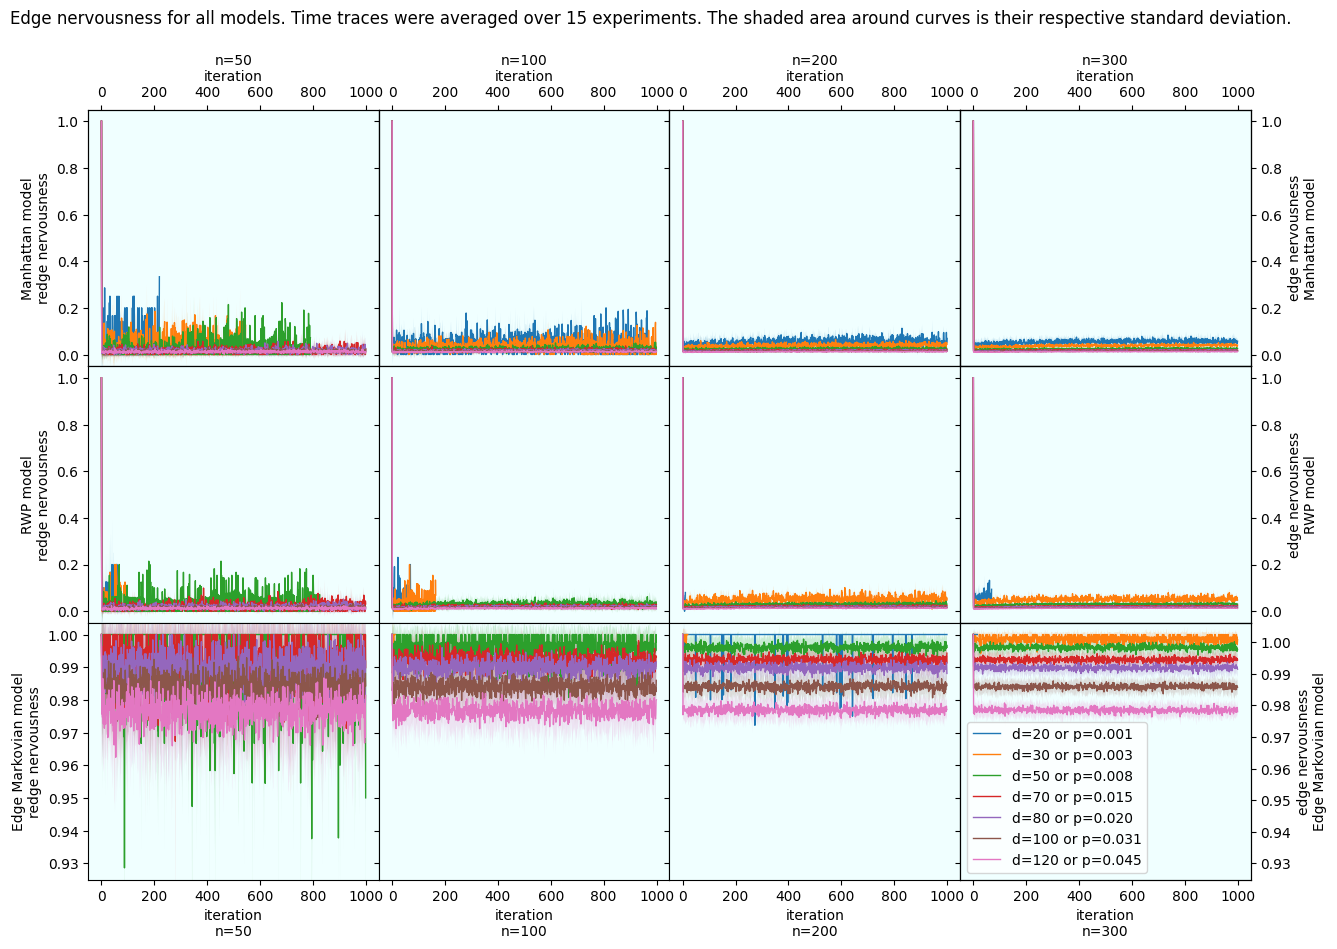

In [421]:
fig: plt.Figure = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row')
colormap = 'gnuplot'
xlims = [1000] * 5
ylims = [1.1] * 5
ttl = 5
ylabelnames = ["Manhattan model", "RWP model", "Edge Markovian model"]

for row, df in enumerate([res_manh_df, res_rwp_df, res_edge_df]):
    df_ttl = df.groupby("ttl", sort=True).get_group(ttl)

    for n, df_n in df_ttl.groupby("n", sort=True):
        n = int(n)
        ind_n = nArray.index(n)
        ax: plt.Axes = axes[row][ind_n]
        for exp_no in range(len(df_n)):
            l = np.sum(~np.isnan(df_n["exp_mean"].iloc[exp_no][0, :]))
            # l=1000
            d = int(df_n["d"].iloc[exp_no])
            ind_d = dArray.index(d)
            p = pArray[ind_d]
            label = f"d=%d or p=%.3f" % (d, p)
            val = df_n["exp_mean"].iloc[exp_no][1, :l]
            err = df_n["exp_std"].iloc[exp_no][1, :l]
            ax.plot(range(l), val, label=label, linewidth=1)
            lower = val - err
            upper = val + err
            ax.fill_between(range(l), lower, upper,
                            alpha=0.2)  # ax.legend()  # ax.set_xlim(0,xlims[ind_n])  # ax.set_ylim(0.6,ylims[ind_ttl])
        name = ylabelnames[row]
        ax.set_xlabel(f"iteration\nn={n}")
        ax.set_ylabel(f"{name}\nredge nervousness")
        ax.label_outer()
        if row == 0:
            ax3: plt.Axes = ax.twiny()
            ax3.set_xlabel(f"n={n}\niteration")
            ax3.set_xlim(*ax.get_xlim())
            # ax3.set_xticks(ax.get_xticks())
            ax3.label_outer()  # ax3.set_xticklabels(ax.get_xticklabels())  # ax3.tick_params(axis="x", bottom=False, top=True, labelbottom=False, labeltop=True)
        if n == 300:
            ax2: plt.Axes = ax.twinx()  # instantiate a second axes that shares the same x-axis
            ax2.set_ylabel(f'edge nervousness\n{name}')
            ax2.set_ylim(*ax.get_ylim())
            # ax2.set_yticks(ax.get_yticks())
            ax2.label_outer()  # ax2.set_yticklabels(ax.get_yticklabels())  # ax2.tick_params(axis='y', )
        ax.set_facecolor("azure")
        ax.relim()
        # update ax.viewLim using the new dataLim
        ax.autoscale_view()

axes[2][3].legend()
fig.suptitle(
    "Edge nervousness for all models. Time traces were averaged over 15 experiments. The shaded area around curves is their respective standard deviation.")
plt.savefig("nervousness.pdf", bbox_inches='tight', pad_inches=0, dpi=500)
# fig.subplots_adjust(top=0.9)

# Graph density

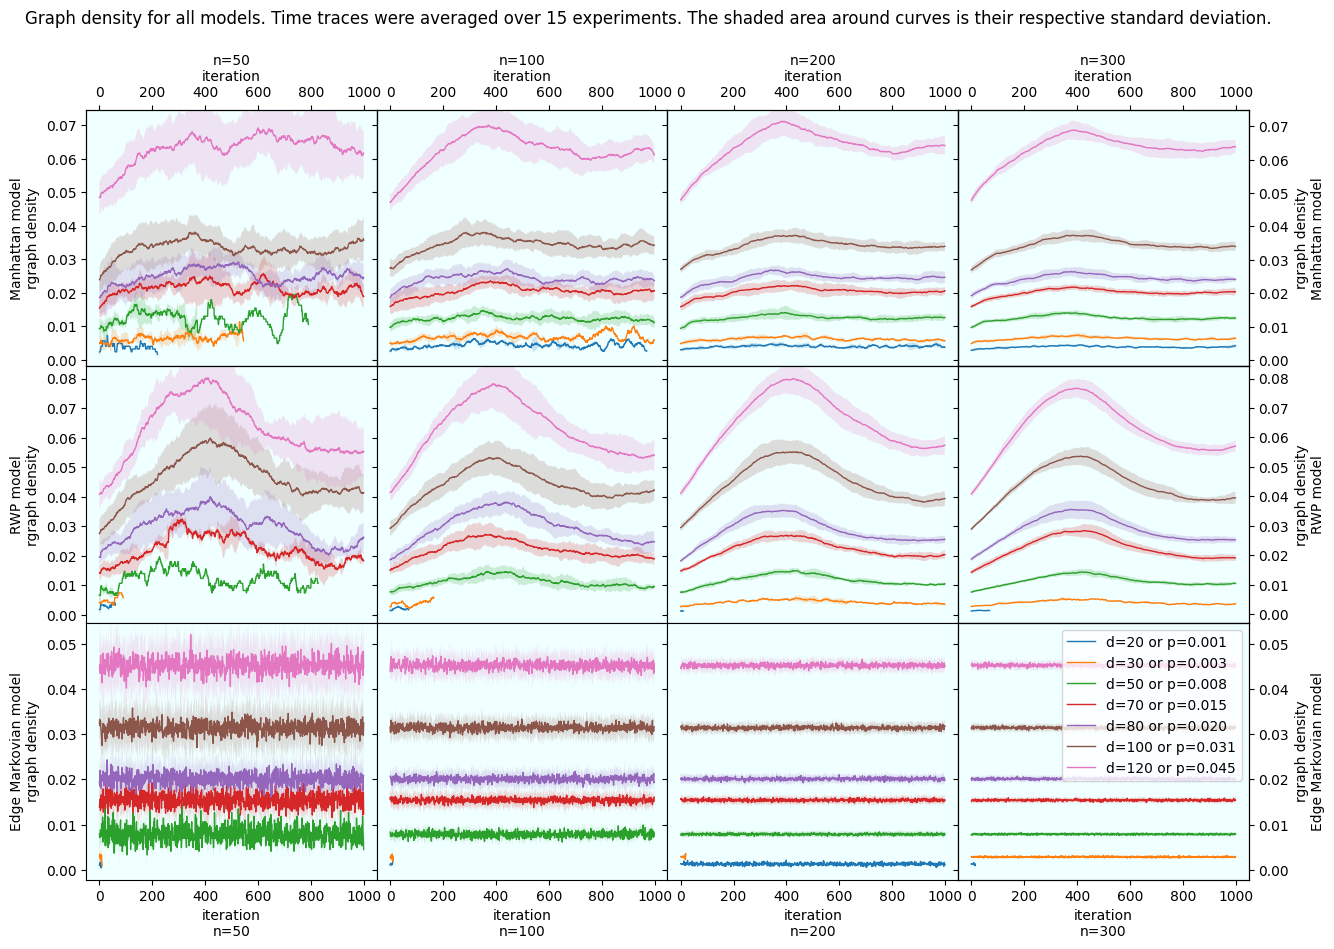

In [422]:
fig: plt.Figure = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row')
colormap = 'gnuplot'
xlims = [1000] * 5
ylims = [1.1] * 5
ttl = 5
ylabelnames = ["Manhattan model", "RWP model", "Edge Markovian model"]

for row, df in enumerate([res_manh_df, res_rwp_df, res_edge_df]):
    df_ttl = df.groupby("ttl", sort=True).get_group(ttl)

    for n, df_n in df_ttl.groupby("n", sort=True):
        n = int(n)
        ind_n = nArray.index(n)
        ax: plt.Axes = axes[row][ind_n]
        for exp_no in range(len(df_n)):
            l = np.sum(~np.isnan(df_n["exp_mean"].iloc[exp_no][0, :]))
            # l=1000
            d = int(df_n["d"].iloc[exp_no])
            ind_d = dArray.index(d)
            p = pArray[ind_d]
            label = f"d=%d or p=%.3f" % (d, p)
            val = df_n["exp_mean"].iloc[exp_no][2, :l]
            err = df_n["exp_std"].iloc[exp_no][2, :l]
            ax.plot(range(l), val, label=label, linewidth=1)
            lower = val - err
            upper = val + err
            ax.fill_between(range(l), lower, upper,
                            alpha=0.2)  # ax.legend()  # ax.set_xlim(0,xlims[ind_n])  # ax.set_ylim(0.6,ylims[ind_ttl])
        name = ylabelnames[row]
        ax.set_xlabel(f"iteration\nn={n}")
        ax.set_ylabel(f"{name}\nrgraph density")
        ax.label_outer()
        if row == 0:
            ax3: plt.Axes = ax.twiny()
            ax3.set_xlabel(f"n={n}\niteration")
            ax3.set_xlim(*ax.get_xlim())
            # ax3.set_xticks(ax.get_xticks())
            ax3.label_outer()
        # ax3.set_xticklabels(ax.get_xticklabels())
        # ax3.tick_params(axis="x", bottom=False, top=True, labelbottom=False, labeltop=True)
        if n == 300:
            ax2: plt.Axes = ax.twinx()  # instantiate a second axes that shares the same x-axis
            ax2.set_ylabel(f'rgraph density\n{name}')
            ax2.set_ylim(*ax.get_ylim())
            # ax2.set_yticks(ax.get_yticks())
            ax2.label_outer()  # ax2.set_yticklabels(ax.get_yticklabels())  # ax2.tick_params(axis='y', )
        ax.set_facecolor("azure")
        ax.relim()
        # update ax.viewLim using the new dataLim
        ax.autoscale_view()

axes[2][3].legend()
fig.suptitle(
    "Graph density for all models. Time traces were averaged over 15 experiments. The shaded area around curves is their respective standard deviation.")
plt.savefig("density.pdf", bbox_inches='tight', pad_inches=0, dpi=500)

# Connected components relative to nodes number

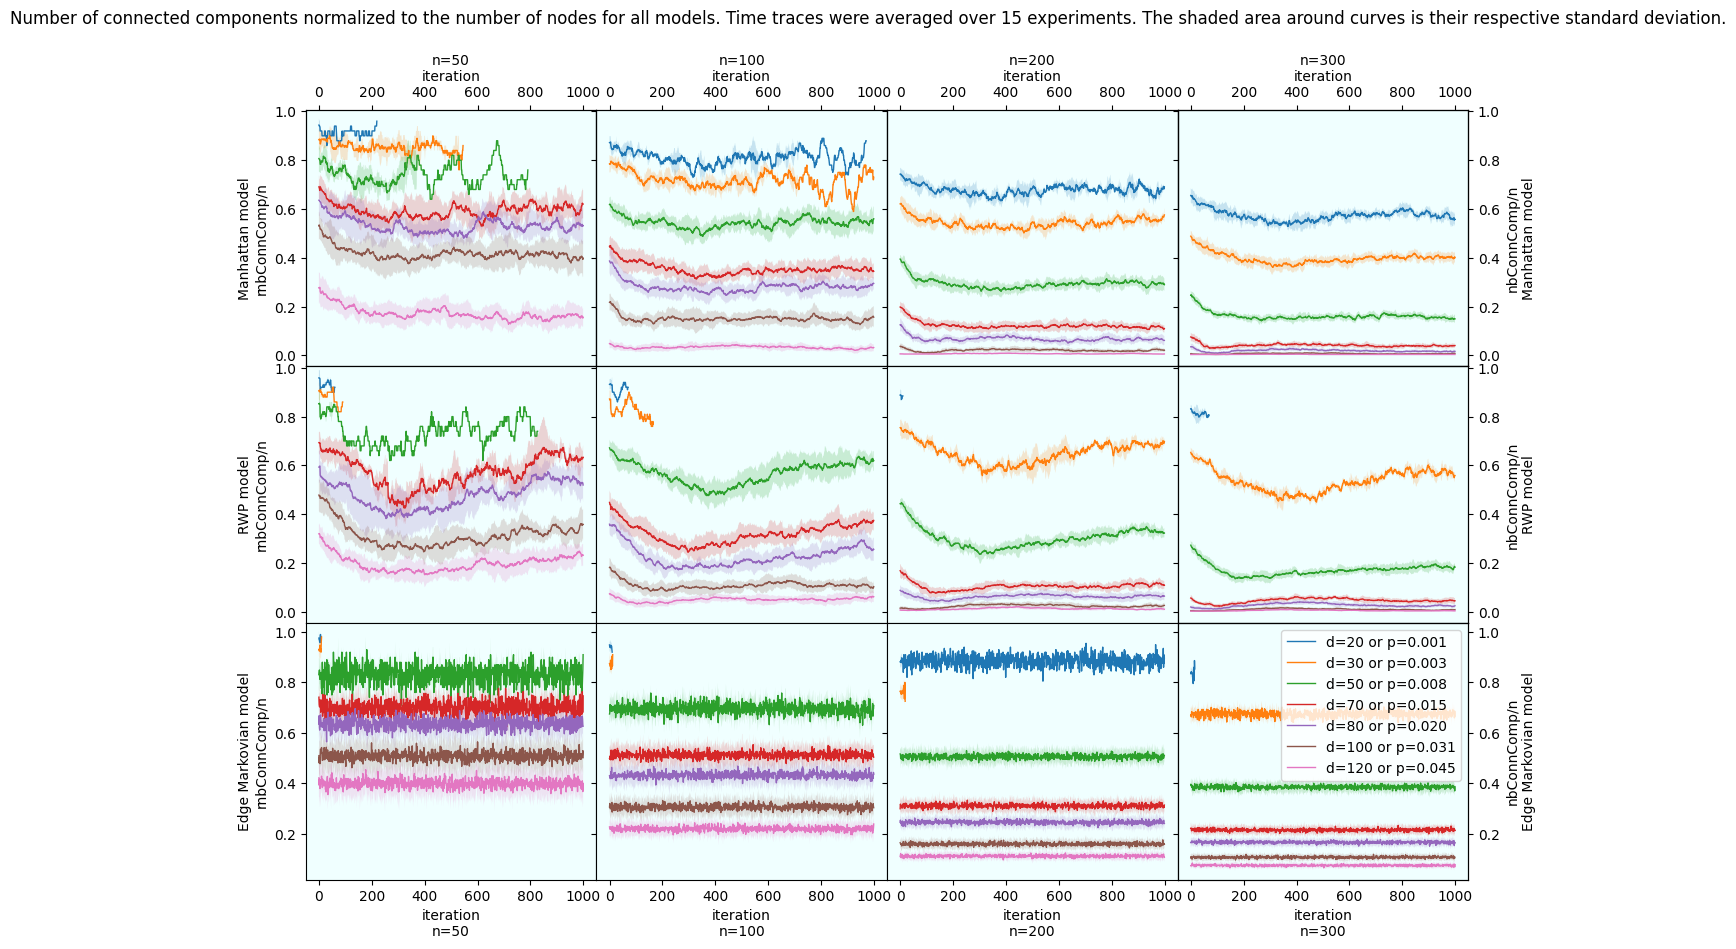

In [424]:

fig: plt.Figure = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row')
colormap = 'gnuplot'
xlims = [1000] * 5
ylims = [1.1] * 5
ttl = 5
ylabelnames = ["Manhattan model", "RWP model", "Edge Markovian model"]

for row, df in enumerate([res_manh_df, res_rwp_df, res_edge_df]):
    df_ttl = df.groupby("ttl", sort=True).get_group(ttl)

    for n, df_n in df_ttl.groupby("n", sort=True):
        n = int(n)
        ind_n = nArray.index(n)
        ax: plt.Axes = axes[row][ind_n]
        for exp_no in range(len(df_n)):
            l = np.sum(~np.isnan(df_n["exp_mean"].iloc[exp_no][3, :]))
            # l=1000
            d = int(df_n["d"].iloc[exp_no])
            ind_d = dArray.index(d)
            p = pArray[ind_d]
            label = f"d=%d or p=%.3f" % (d, p)
            val = df_n["exp_mean"].iloc[exp_no][3, :l] / n
            err = df_n["exp_std"].iloc[exp_no][3, :l] / n
            ax.plot(range(l), val, label=label, linewidth=1)
            lower = val - err
            upper = val + err
            ax.fill_between(range(l), lower, upper,
                            alpha=0.2)  # ax.legend()  # ax.set_xlim(0,xlims[ind_n])  # ax.set_ylim(0.6,ylims[ind_ttl])
        name = ylabelnames[row]
        ax.set_xlabel(f"iteration\nn={n}")
        ax.set_ylabel(f"{name}\nrnbConnComp/n")
        ax.label_outer()
        ax.relim()
        # update ax.viewLim using the new dataLim
        ax.autoscale_view()
        if row == 0:
            ax3: plt.Axes = ax.twiny()
            ax3.set_xlabel(f"n={n}\niteration")
            ax3.set_xlim(*ax.get_xlim())
            # ax3.set_xticks(ax.get_xticks())
            ax3.label_outer()
        # ax3.set_xticklabels(ax.get_xticklabels())
        # ax3.tick_params(axis="x", bottom=False, top=True, labelbottom=False, labeltop=True)
        if n == 300:
            ax2: plt.Axes = ax.twinx()  # instantiate a second axes that shares the same x-axis
            ax2.set_ylabel(f'nbConnComp/n\n{name}')
            ax2.set_ylim(*ax.get_ylim())
            # ax2.set_yticks(ax.get_yticks())
            ax2.label_outer()  # ax2.set_yticklabels(ax.get_yticklabels())  # ax2.tick_params(axis='y', )
        ax.set_facecolor("azure")

axes[2][3].legend()
fig.suptitle(
    "Number of connected components normalized to the number of nodes for all models. Time traces were averaged over 15 experiments. The shaded area around curves is their respective standard deviation.")
plt.savefig("conn_comp.pdf", bbox_inches='tight', pad_inches=0, dpi=500)

In [425]:
!jupyter nbconvert --to pdf results.ipynb

[NbConvertApp] Converting notebook results.ipynb to pdf
[NbConvertApp] Support files will be in results_files/
[NbConvertApp] Making directory ./results_files
[NbConvertApp] Making directory ./results_files
[NbConvertApp] Making directory ./results_files
[NbConvertApp] Making directory ./results_files
[NbConvertApp] Making directory ./results_files
[NbConvertApp] Making directory ./results_files
[NbConvertApp] Making directory ./results_files
[NbConvertApp] Writing 94191 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 3325979 bytes to results.pdf
